In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:

df=pd.read_csv('../input/iris/Iris.csv')
df.head()
df.shape

(150, 6)

In [3]:
df.head()
#removing id col 
df.drop('Id',axis=1,inplace=True)

In [4]:
df.shape
df.head()
df.Species.value_counts()
#Here we can see that there are three types of species 
#Our aim is create a model to claasify these 3 types

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()
df.isnull().sum()
#here we can see that there are no null values in any of the features
#Further we can get more insides using describe function
#We can say that there is no null values in the any features of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


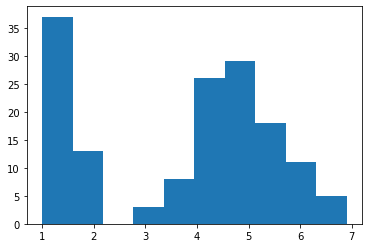

In [8]:
import matplotlib.pyplot as plt
plt.hist(df['PetalLengthCm'])
plt.show()
#here we can see that the petal length is divided into two sections

df.groupby(by="Species")

In [9]:
ex1=df.groupby(by="Species")
list(ex1)
print(ex1.median())

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa                5.0           3.4           1.50           0.2
Iris-versicolor            5.9           2.8           4.35           1.3
Iris-virginica             6.5           3.0           5.55           2.0


In [10]:
print(ex1.mean())
#Here we can see the mean value of each type of species for every feature
df.columns

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

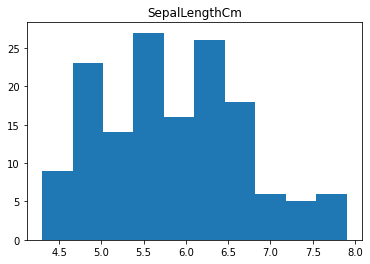

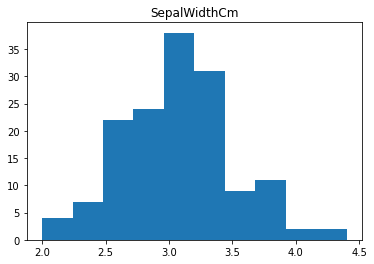

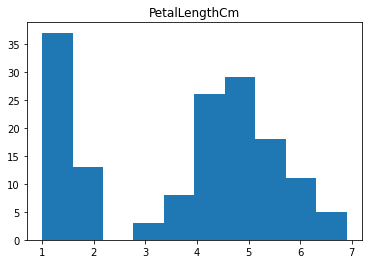

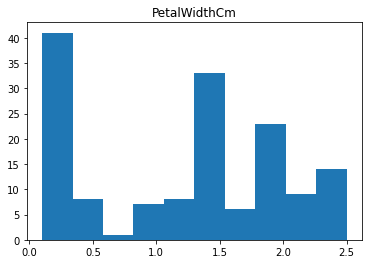

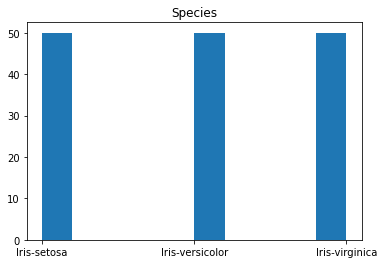

In [11]:
for i in df.columns:
    
    plt.hist(df[i])
    plt.title(i)
    plt.show()
#Here i plotted histogram of every feature

In [12]:
l1=df.columns
l1=l1[0:4]
l1


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

Text(0, 0.5, 'PetalWidthCm')

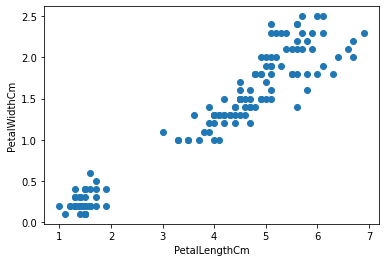

In [13]:
#this is just for self explanantion and learning part
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')


In [14]:
df1=df.drop('Species',axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
import seaborn as sns

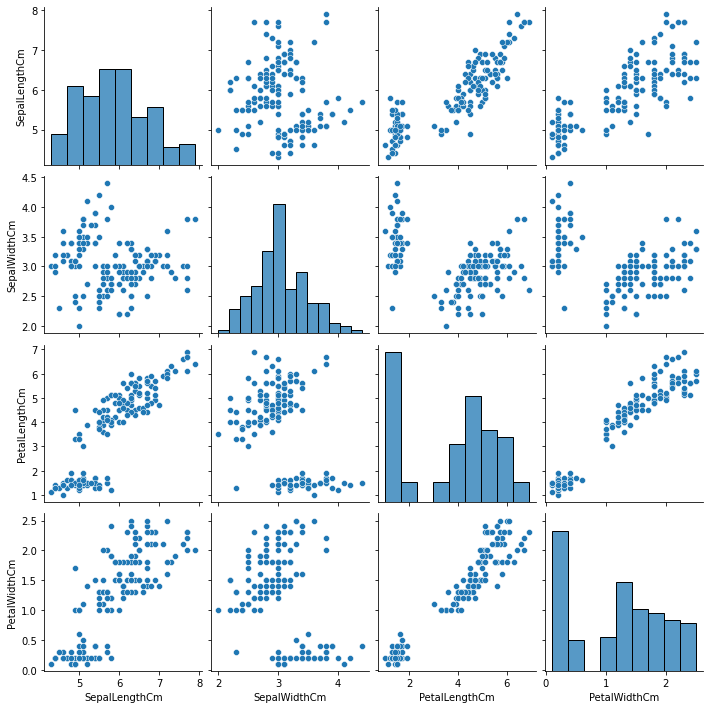

In [16]:
sns.pairplot(data=df1,palette=['green','red'])

# Exploratory Data Analysis(EDA)

# To draw scatter plot for differt species


In [17]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

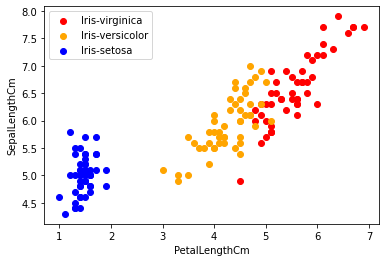

In [18]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['SepalLengthCm'],c = colors[i], label=species[i])
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalLengthCm')
plt.legend()
 

Above Graph shows us the relation between sepal length and petallenth for different species,we will do it for the rest of features for better understanding

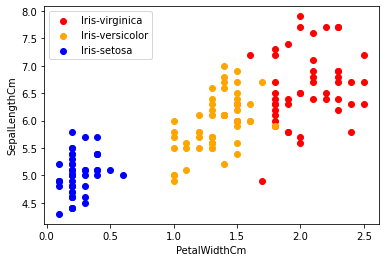

In [19]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalWidthCm'],x['SepalLengthCm'],c = colors[i], label=species[i])
plt.xlabel('PetalWidthCm')
plt.ylabel('SepalLengthCm')
plt.legend()

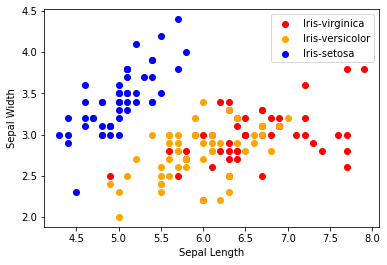

In [20]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

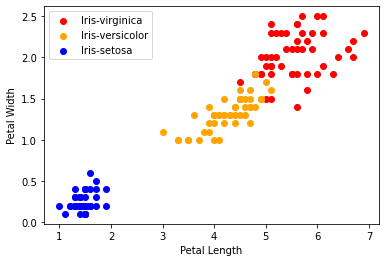

In [21]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

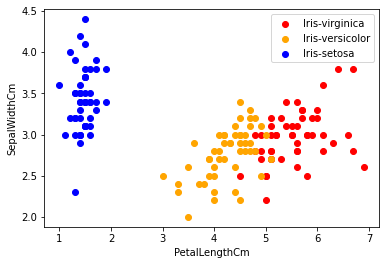

In [22]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['SepalWidthCm'],c = colors[i], label=species[i])
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
 

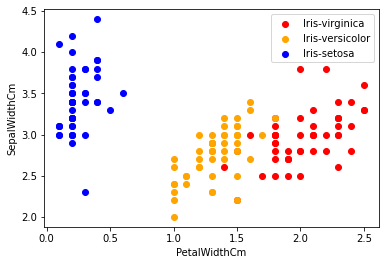

In [23]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalWidthCm'],x['SepalWidthCm'],c = colors[i], label=species[i])
plt.xlabel('PetalWidthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
 

Above graphs shows better classification and important features,it helps to classify or select better features when we have more features.Here we only have 4 features so we are going to use those features for our models

Now we will Use corelation matrix .to find out corelation between different features .its values are in between -1 to 1 .strong corelation suggest that we can drop few columns having higher corelation in case of higher features 

In [24]:
corel_matrix=df.corr()
print(corel_matrix)
#here we created corealtion mtarix.

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


<AxesSubplot:>

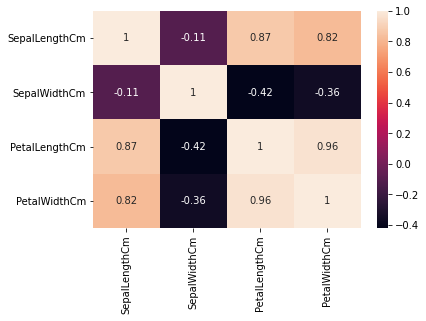

In [25]:
sns.heatmap(data=corel_matrix,annot=True)
#here the features are less so we will not drop any features

Now we will use logistic regression,below we seperated data in train test.

In [26]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
print(model.predict(x_test))

['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica']


In [28]:
model.score(x_test,y_test)
#here score indicates the accuracy of the data

1.0

In [29]:
df.info()
#here we can see that the output columns is in objecttype
#sometimes in model gets complex to understand object so we can convert it into other type using lable encoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Lable Encoder

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#here we created the object od lable encoder class
df['Species']=le.fit_transform(df['Species'])
df.head()
df['Species'].value_counts()


0    50
1    50
2    50
Name: Species, dtype: int64

In [57]:
#here we will train the model again
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# model training
lr.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [59]:
lr.score(x_test,y_test)

print("Accuracy of model is:",lr.score(x_test,y_test))


Accuracy of model is: 0.9333333333333333


In [49]:
from sklearn.neighbors import KNeighborsClassifier
# knn - k-nearest neighbours
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [60]:
kn.score(x_test,y_test)
print("Accuracy of knn classifier is:",kn.score(x_test,y_test))

Accuracy of knn classifier is: 0.9777777777777777


In [61]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
dt.score(x_test,y_test)
print("Accuracy of dicison tree classifier is ",dt.score(x_test,y_test))

Accuracy of dicison tree classifier is  0.9555555555555556
